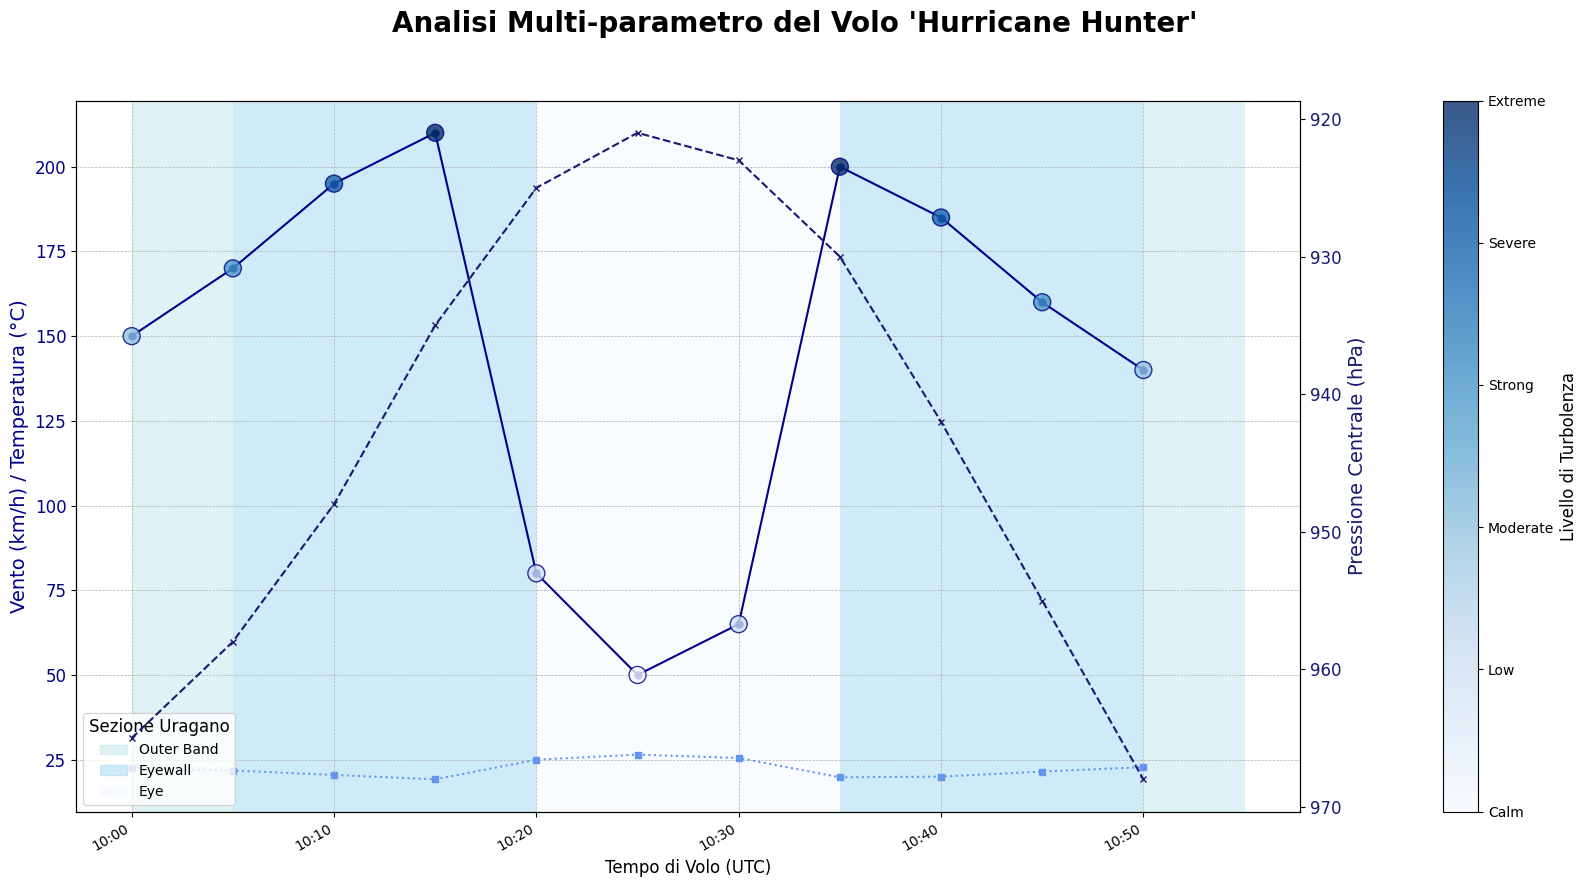

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Patch

try:
    df = pd.read_csv("../data/hurricane_hunter_flight_data.csv")
except FileNotFoundError:
    print("Errore: File 'hurricane_hunter_flight_data.csv' non trovato.")
    print("Assicurati che il file CSV sia nella stessa cartella dello script Python.")
    exit()

df['timestamp'] = pd.to_datetime(df['timestamp'])

fig, ax1 = plt.subplots(figsize=(16, 9))

storm_colors = {
    'Outer Band': 'powderblue',
    'Eyewall': 'skyblue',
    'Eye': 'aliceblue'
}

color_pressure = 'midnightblue'
color_temp_line = 'cornflowerblue'

groups = (df['part_of_storm'] != df['part_of_storm'].shift()).cumsum()
for i, group in df.groupby(groups):
    part_name = group['part_of_storm'].iloc[0]
    start_time = group['timestamp'].iloc[0]
    end_time = group['timestamp'].iloc[-1]
    end_time_extended = end_time + pd.Timedelta(minutes=5)
    ax1.axvspan(start_time, end_time_extended, color=storm_colors[part_name], alpha=0.4, lw=0)

ax1.set_xlabel('Tempo di Volo (UTC)', fontsize=12)
ax1.set_ylabel('Vento (km/h) / Temperatura (°C)', fontsize=14, color='darkblue')
ax1.plot(df['timestamp'], df['wind_speed_kmh'], color='darkblue', marker='o', linestyle='-', markersize=5, label='Velocità Vento')
ax1.plot(df['timestamp'], df['air_temperature_celsius'], color=color_temp_line, marker='s', linestyle=':', markersize=5, label='Temperatura Aria')
ax1.tick_params(axis='y', labelcolor='darkblue', labelsize=12)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

ax2 = ax1.twinx()
ax2.plot(df['timestamp'], df['pressure_hpa'], color=color_pressure, marker='x', linestyle='--', markersize=5, label='Pressione')
ax2.set_ylabel('Pressione Centrale (hPa)', fontsize=14, color=color_pressure)
ax2.invert_yaxis()
ax2.tick_params(axis='y', labelcolor=color_pressure, labelsize=12)

turbulence_mapping = {
    'Calm': 1, 'Low': 2, 'Moderate': 3, 'Strong': 4, 'Severe': 5, 'Extreme': 6
}
df['turbulence_numeric'] = df['turbulence_level'].map(turbulence_mapping)

scatter = ax1.scatter(df['timestamp'], df['wind_speed_kmh'], 
                      c=df['turbulence_numeric'], 
                      s=150, 
                      cmap='Blues', 
                      label='Turbolenza', 
                      zorder=10,
                      edgecolors='navy',
                      alpha=0.8)

fig.suptitle("Analisi Multi-parametro del Volo 'Hurricane Hunter'", fontsize=20, fontweight='bold')
fig.autofmt_xdate(rotation=30)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax1.tick_params(axis='x', labelsize=10)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=10)

cbar = fig.colorbar(scatter, ax=ax2, pad=0.1, fraction=0.04)
cbar.set_label('Livello di Turbolenza', fontsize=12)
cbar.set_ticks(list(turbulence_mapping.values()))
cbar.set_ticklabels(list(turbulence_mapping.keys()))

legend_patches = [Patch(color=v, alpha=0.4, label=k) for k, v in storm_colors.items()]
ax1.legend(handles=legend_patches, title="Sezione Uragano", loc='lower left', fontsize=10, title_fontsize=12)

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('grafico_combinato_hurricane_hunter_tutto_blu.png', dpi=300)
plt.show()